importare pacchetti python di base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

importare i pacchetti GIS necessari per visualizzare

In [2]:
import geopandas as gpd

adesso importiamo lo shapefile direttamente dal repository di github (in questo esempio apriremo il file del Comune di Roma, basta cambiare il nome della città per importare gli altri). Per farlo, utilizzeremo il framework "Virtual File System" offerto da GDAL (https://gdal.org/user/virtual_file_systems.html)


In [16]:
nome_citta="roma"
indirizzo_richiesta="/vsicurl/https://github.com/gabrielepinto/dati-sezioni-elettorali/raw/main/shapefiles_sezioni_elettorali/precincts_{0}_census/precincts_{0}_census.shp".format(nome_citta)
print("questo è l'indirizzo da passare al reader")
print(indirizzo_richiesta)

questo è l'indirizzo da passare al reader
/vsicurl/https://github.com/gabrielepinto/dati-sezioni-elettorali/raw/main/shapefiles_sezioni_elettorali/precincts_roma_census/precincts_roma_census.shp


ora leggiamo il file

In [17]:
file_roma=gpd.read_file(indirizzo_richiesta)

vediamo come sono le sezioni elettorali

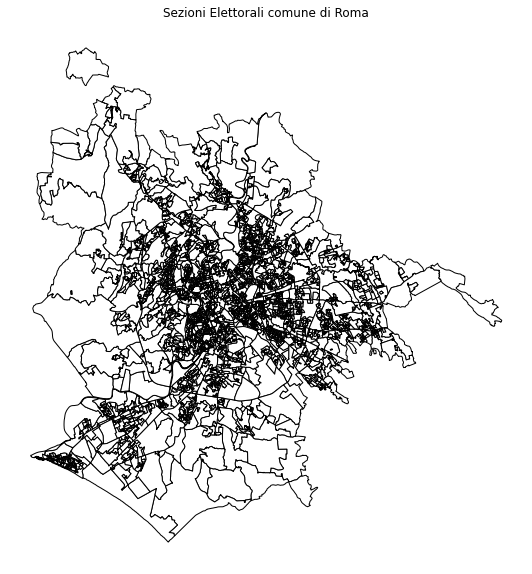

In [30]:
fig,axs=plt.subplots(figsize=(10,10))
file_roma.plot(ax=axs,color="white",edgecolor="black")
axs.set_axis_off()
axs.set_title("Sezioni Elettorali comune di Roma");

Adesso mergiamo il file delle sezioni elettorali con alcuni risultati elettorali... per farlo.. scarichiamo prima la lista delle elezioni disponibili 

n.b. possiamo sia scaricarle in locale che leggerle direttamente dal repository di github (quello che faremo in questo esempio)

In [32]:
anagrafica=pd.read_csv("https://raw.githubusercontent.com/gabrielepinto/dati-sezioni-elettorali/main/anagrafica_completa_all_cities.csv")

In [38]:
anagrafica.loc[anagrafica["CITTA"]=="ROMA"].head()

,NOMEFILE,ANNO,TIPO,rounds,liste_sindaco_preferenze_referendum_presidente,DATA,CITTA,id_elections
51,liste_regionali2005.csv,2005,regionali,single round,liste,2005-04-04,ROMA,liste_regionali2005.csv2005_regionali_single r...
52,camera_2006.csv,2006,camera,single round,liste,2006-04-09,ROMA,camera_2006.csv2006_camera_single round_ROMA
53,comunali_sindaco_2008.csv,2008,comunali,first round,sindaco,2008-04-13,ROMA,comunali_sindaco_2008.csv2008_comunali_first r...
54,comunali_sindaco_ballotagio_2008.csv,2008,comunali,run-off,sindaco,2008-04-27,ROMA,comunali_sindaco_ballotagio_2008.csv2008_comun...
55,camera_2008.csv,2008,camera,single round,liste,2008-04-13,ROMA,camera_2008.csv2008_camera_single round_ROMA


scegliamo il risultato del ballottaggio delle ultime elezioni

In [43]:
anagrafica.loc[(anagrafica["ANNO"]==2021)&(anagrafica["CITTA"]=="ROMA")]

,NOMEFILE,ANNO,TIPO,rounds,liste_sindaco_preferenze_referendum_presidente,DATA,CITTA,id_elections
68,comunali_sindaco_2021.csv,2021,comunali,first round,sindaco,2021-10-03,ROMA,comunali_sindaco_2021.csv2021_comunali_first r...
69,comunali_sindaco_ballotagio_2021.csv,2021,comunali,run-off,sindaco,2021-10-17,ROMA,comunali_sindaco_ballotagio_2021.csv2021_comun...


prendiamo il nome del file con index 69 

In [49]:
print(anagrafica.loc[69,"NOMEFILE"])
nome_file=anagrafica.loc[69,"NOMEFILE"]

comunali_sindaco_ballotagio_2021.csv


adesso scarichiamo il file vero e proprio contenuto nell'archivio. Per fare questa operazione è necessario scaricare l'archivio "risultati elettorali.rar" in una cartella sul vostro pc. n.b. l'archivio può essere scaricato da qui https://github.com/gabrielepinto/dati-sezioni-elettorali/blob/main/risultati_elettorali.rar

In [205]:
## QUI INSERITE IL FOLDER IN CUI AVETE ESTRATTO L'ARCHIVIO
## nel mio caso si chiama replication_politics_results ma potete chiamarlo come preferite
folder_risultati_elettorali="D:\\database_vari_miei\\replication_politics_results\\"

aprite il file delle elezioni in questione

In [208]:
folder_risultati_elettorali+nome_citta+"\\"+nome_file

'D:\\database_vari_miei\\replication_politics_results\\roma\\comunali_sindaco_ballotagio_2021.csv'

In [210]:
dati_elezione=pd.read_csv(folder_risultati_elettorali+nome_citta+"\\"+nome_file)

In [213]:
dati_elezione.head()

,SEZIONE,ENRICO MICHETTI,ROBERTO GUALTIERI,TOTALE,AFFLUENZA
0,1,215,292,507,0.509036
1,2,109,161,270,0.421217
2,3,105,213,318,0.402532
3,4,105,142,247,0.501014
4,5,126,226,352,0.530120


a questo punto effettuare il merge tra il file delle sezioni e quello dei dati dei risultati elettorali utilizzando la chiave "SEZIONE"

In [212]:
file_completo=pd.merge(file_roma,dati_elezione,on="SEZIONE")

ora potete visualizzare i dati... ad es: il risultato di Roberto Gualtieri nelle varie sezioni

In [215]:
file_completo["GUALTIERI (%)"]=file_completo["ROBERTO GUALTIERI"]/file_completo["TOTALE"]

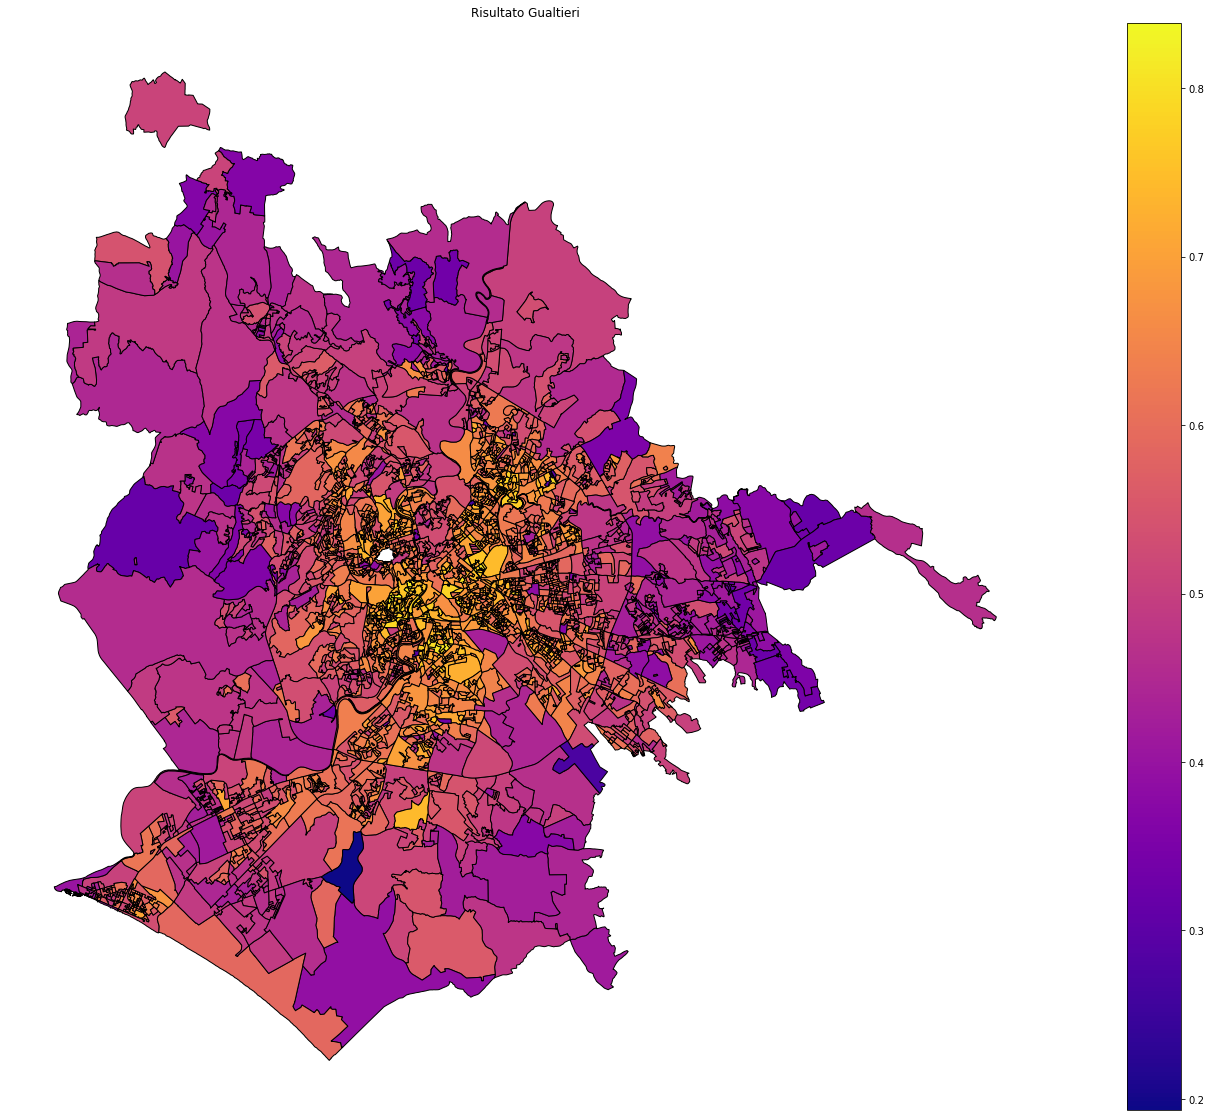

In [223]:
fig,axs=plt.subplots(figsize=(30,20))
file_completo.plot(ax=axs,edgecolor="black",column="GUALTIERI (%)",legend=True,cmap="plasma")
axs.set_axis_off()
axs.set_title("Risultato Gualtieri");